<hr style="border: 1px solid #000;"> 

# Сеть фитнес-центров «Культурист-датасаентист»

<hr style="border: 1px solid #000;"> 

## Описание проекта
<br>
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. <br> Задача — провести анализ и подготовить план действий по удержанию клиентов. <br> 

* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента; <br>
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства; <br>
* проанализировать основные признаки, наиболее сильно влияющие на отток; <br>
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами: <br>
1) выделить целевые группы клиентов; <br>
2) предложить меры по снижению оттока; <br>
3) определить другие особенности взаимодействия с клиентами. <br>
<br>
 


<b> Описание данных </b>

Подготовлены данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

* Churn — факт оттока в текущем месяце; <br>
Текущие поля в датасете:  <br>
Данные клиента за предыдущий до проверки факта оттока месяц:  <br>
* gender — пол; <br>
* Near_Location — проживание или работа в районе, где находится фитнес-центр; <br>
* Partner — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента); <br>
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента); <br>
* Phone — наличие контактного телефона; <br>
* Age — возраст; <br>
* Lifetime — время с момента первого обращения в фитнес-центр (в месяцах).


Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента: <br>
* Contract_period — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год); <br>
* Month_to_end_contract — срок до окончания текущего действующего абонемента (в месяцах); <br>
* Group_visits — факт посещения групповых занятий; <br>
* Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента; <br>
* Avg_class_frequency_current_month — средняя частота посещений в неделю за предыдущий месяц; <br>
* Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<hr style="border: 1px solid #000;"> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier  
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [3]:
df.info()
def obzor (d, n):
    return pd.concat([d.head(n), d.sample(n, random_state=42), d.tail(n)], axis=0)
obzor(df, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
555,1,1,0,0,1,6,1,37,205.631751,5.0,2,1.400690,1.614663,0
3491,0,0,0,0,1,6,0,27,137.370917,6.0,24,0.918920,1.093414,0
527,1,1,0,0,1,1,1,25,41.607768,1.0,1,2.893104,2.813602,0
3925,1,0,0,0,1,1,0,31,9.593524,1.0,14,2.131718,2.147013,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0


In [4]:
df.duplicated().sum()

0

Пропусков и дубликатов нет, типы данных в порядке. Можно изменить тип у месяца (срок окончания контракта). Названия столбцов приведем к нижнему регистру.

In [5]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype('int')
df.columns = df.columns.str.lower()

## Исследовательский анализ данных (EDA)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Тут мы видим, что мужчины и женщины посещают зал примерно поровну. <br> 
Люди предпочитают ходить в зал поближе к дому или работе. <br> 
Около половины клиентов - сотрудники компаний-партнёров. <br> 
Треть клиентов пришли по акции "приведи друга". <br> 
90% клиентов указывают свои контактные данные. <br> 
Средняя длительность текущего действующего абонемента - 4.7 мес <br> 
Групповые занятия посещают немного меньше половины клиентов. <br> 
Средний возраст - около 30 лет (26-32). <br> 
<br> 
Средняя суммарная выручка от других услуг фитнес-центра - 147 <br> 
Средний срок до окончания - около 4 месяцев.  <br> 
Время с момента первого обращения - 3,7 месяцев. <br> 
Средняя частота посещений в неделю за все время с начала действия абонемента - 1,88. <br> 
Средняя частота посещений в неделю за предыдущий месяц - 1,77. <br> 
Отток в текущем месяце 26%. <br> 

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [8]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Среди тех, кто остался, больше: 

- живущих/работающих неподалеку
- работников компаний-партнеров
- пришедших по акции с другом
- купивших абон на длинный срок
- посетителей крупповых занятий
- кто тратит больше на доп.услуги
- абонемент закончится нескоро
- дольше посещают клуб
- чаще посещают клуб


Что может влиять на отток при первом взгляде: частота посещений, короткий срок абонемента, низкий lifetime (выше лайфтайм - меньше отток). Клиенты реже приходят по промо. Посмотрим подробнее на графиках.

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [9]:
no_churn = df.query('churn == 0')
churn = df.query('churn == 1')

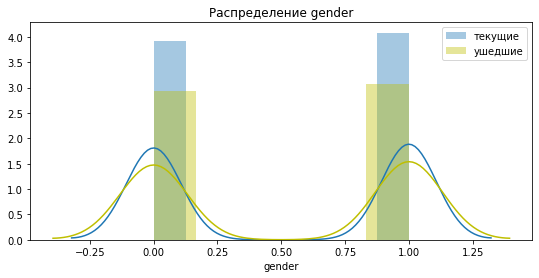

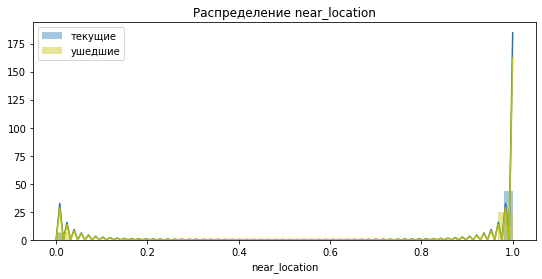

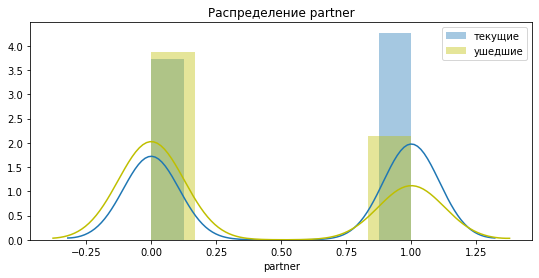

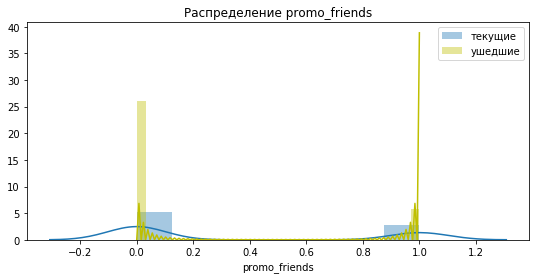

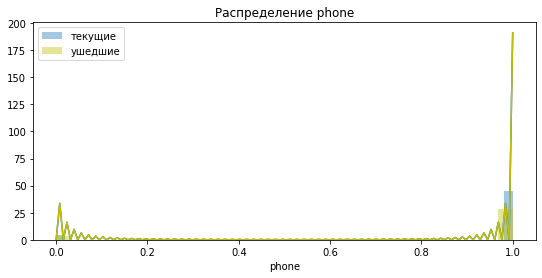

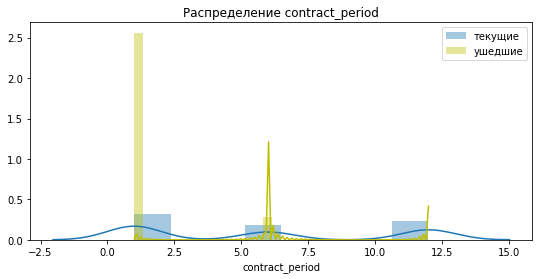

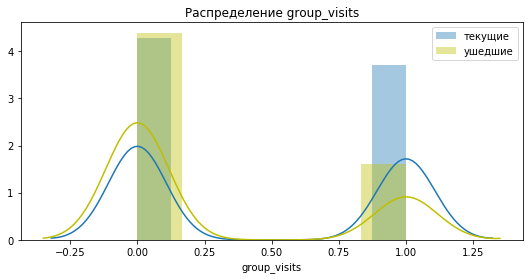

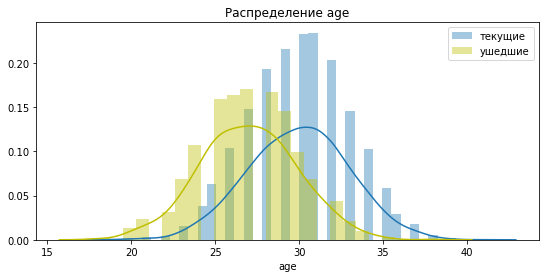

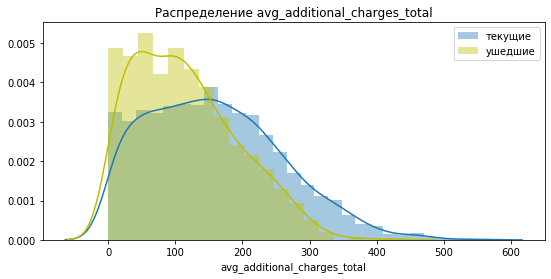

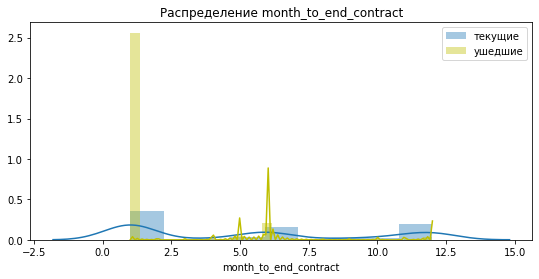

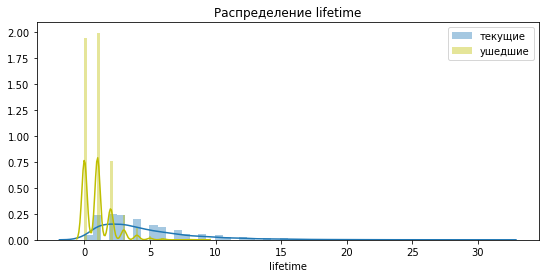

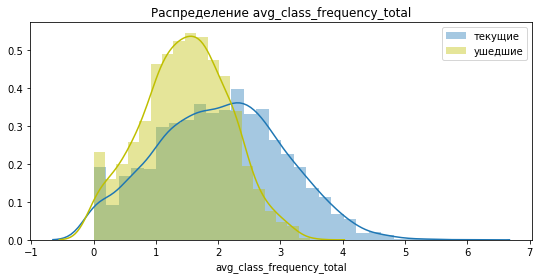

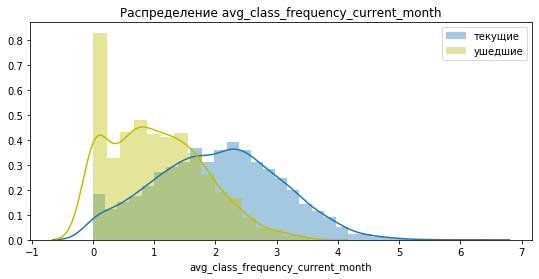

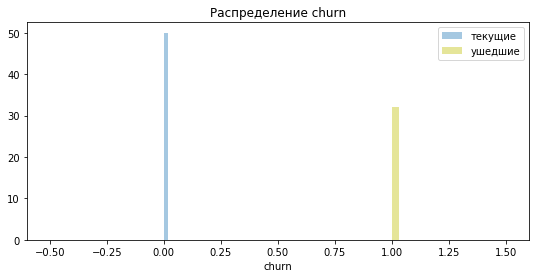

In [10]:
for column in df.columns:
    plt.figure(figsize=(9, 4))
    #df.groupby('churn')[column]
    sns.distplot(no_churn[column], label = 'текущие')
    sns.distplot(churn[column], color = 'y', label = 'ушедшие')
    plt.title('Распределение ' + column)
    plt.legend()
    plt.show()

Обычно в отток уходят клиенты:

- проживающие или работающие далеко от клуба
- не являющиеся сотрудниками компаний-партнеров
- не пользовались акцией "приведи друга"
- абонемент сроком 1 месяц (мин отток у клиентов на 12 мес)
- не посещающие групповые занятия
- в возрасте от 20 до 30 (постоянные - от 27)
- меньше тратившие на дополнительные услуги
- срок окончания абонемента 1 месяц
- низкий Lifetime
- средняя частота посещений в неделю за все время - 0-2 раза
- средняя частота посещений в неделю за предыдущий месяц - 0-1 раз
 

Построим матрицу корреляций 

In [11]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


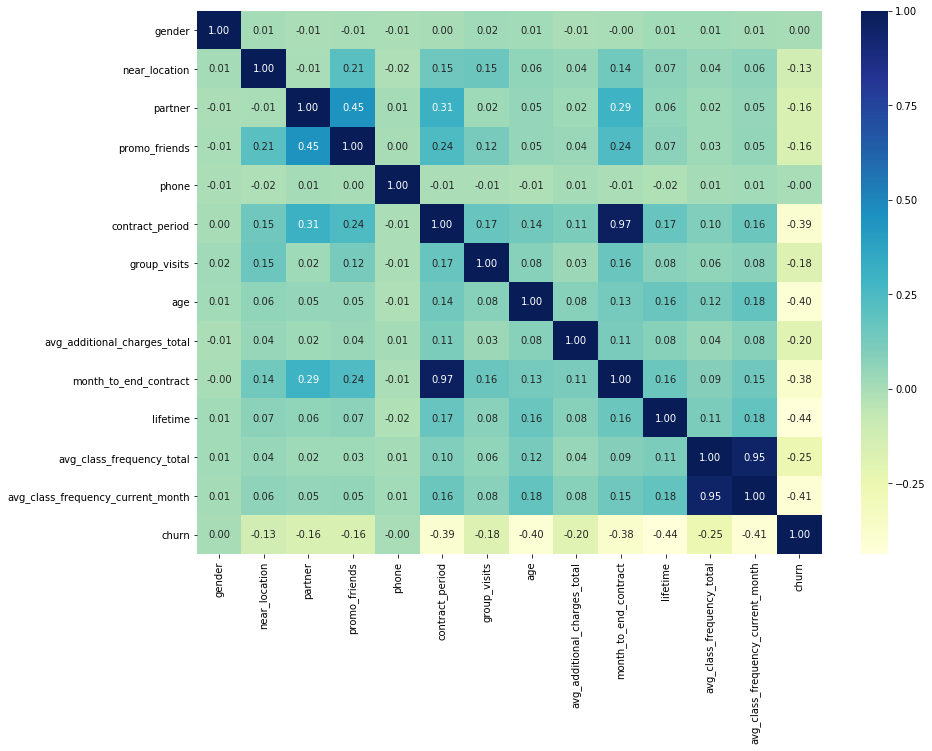

In [12]:
plt.figure(figsize = (14, 10))
cm = df.corr() 
sns.heatmap(cm, annot = True, fmt = '.2f', cmap="YlGnBu")
plt.show()

Нулевая корреляция с целевой переменной churn: пол, контакты. <br>
Корреляция с целевой переменной churn: возраст, lifetime, средняя частота посещений в неделю за предыдущий месяц; contract_period, month_to_end_contract

Высокая корреляция: month_to_end_contract и contract_period = 0,97;
avg_class_frequency_current_month и avg_class_frequency_total = 0,95.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце. <br>

Обучим модель на train-выборке двумя способами: 
- логистической регрессией LogisticRegression
- случайным лесом RandomForestClassifier

In [13]:
# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

# разобьем данные на обучающую и валидационную выборку функцией train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

Используем атрибут `stratify` для целевой переменной. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
Используем параметр `random_state`, чтобы получать одни и те же результаты.
     

### LogisticRegression

In [14]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()

# обучим модель
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

In [16]:
print('Метрики для модели логистической регрессии:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format((recall_score(y_test, lr_predictions))))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, lr_predictions)))
print()

Метрики для модели логистической регрессии:
Accuracy: 0.92
Precision: 0.89
Recall: 0.80
F1: 0.84
ROC_AUC: 0.88



### RandomForestClassifier

In [17]:
# обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# преобразуем обучающий и валидационный наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [18]:
# алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [19]:
print('Метрики для модели случайного леса:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format((recall_score(y_test, rf_predictions))))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

Метрики для модели случайного леса:
Accuracy: 0.91
Precision: 0.85
Recall: 0.78
F1: 0.81
ROC_AUC: 0.87


При использовании логистической регрессии доля прравильных ответов составляет 92%, при использовании  случайного леса - 91%.  Метрики точности (Precision) и полноты (recall) при использовании логистической регрессии выше на 4% и 2% соответственно.


F-мера - совместная оценка точности и полноты - ниже у случайного леса на 2%. ROC AUC - площадь под кривой ошибок - у леса ниже на 1%.

Оценив метрики accuracy, precision и recall для обеих моделей на валидационной выборке, можем сказать, что модель регрессии показала себя лучше.

## Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию клиентов

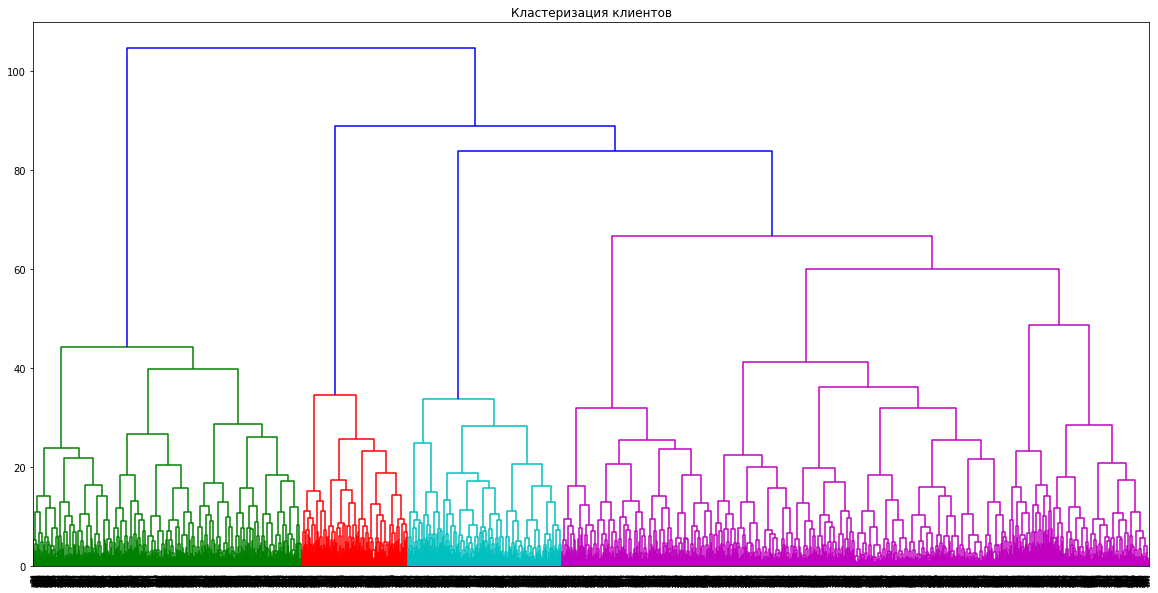

In [21]:
df2 = df.drop(['churn'], axis=1)

# стандартизируем данные 
sc = StandardScaler()
df2_sc = sc.fit_transform(df2)

# построим матрицу расстояний функцией linkage
linked = linkage(df2_sc, method = 'ward')

# выводим дендрограмму
plt.figure(figsize = (20, 10))  
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация клиентов')
plt.show()

На основании полученного графика можем предположить, что можно выделить 4 основных кластера. 

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Примем за число кластеров n=5

In [22]:
km = KMeans(n_clusters = 5, random_state = 42)
labels = km.fit_predict(df2_sc)
df['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров.

In [23]:
df.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.502370,0.554556,0.499422,0.485738,0.523316
near_location,0.949447,0.849269,0.937572,0.718011,0.862694
partner,0.829384,0.263217,0.737572,0.299919,0.471503
promo_friends,0.998420,0.052868,0.478613,0.018745,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,3.097946,2.606299,11.854335,1.914425,4.777202
group_visits,0.448657,0.436445,0.546821,0.276284,0.427461
age,29.104265,30.008999,29.905202,28.083945,29.297927
avg_additional_charges_total,141.774331,159.774265,163.509804,129.496414,144.208179
month_to_end_contract,2.887836,2.419573,10.812717,1.821516,4.466321


<b> Кластер 0 </b>

* Отток 25%
* Живут/работают поблизости от клуба (max)
* В основном из компаний-партнеров (max)
* Почти все пришли по акции с другом (max)
* Длительность текущего абонемента 3 месяца
* Групповые посещают чуть меньше половины
* Возраст 29
* Средние траты на доп.услуги
* Абонемент закончится почти через 3 месяца
* Высокий lifetime (max)
* Среднее кол-во посещений в неделю за всё время и в последний месяц - 1,7 и 1,6

<font color="green"><b> Кластер 1 </b> </font> 

* Отток 9%
* Живут/работают недалеко от клуба
* Не сотрудники компаний-партнеров
* Почти никто не пришел по акции 
* Длительность текущего абонемента 2,6 мес
* Групповые посещают чуть меньше половины
* Возраст 30
* Траты на доп.услуги выше среднего
* Абонемент закончится через 2,4 месяца
* Высокий lifetime (max)
* Среднее кол-во посещений в неделю за всё время и в последний месяц - 2,7 (max)

<font color="green"><b> Кластер 2 </b> </font> 

* Отток 2% (min)
* Живут/работают поблизости от клуба
* В основном сотрудники компаний-партнеров
* Чуть меньше половины пришли по акции 
* Длительность текущего абонемента почти год (max)
* Групповые посещают чуть больше половины
* Возраст 30
* Траты на доп.услуги высокие (max)
* Абонемент закончится почти через 11 месяцев
* Высокий lifetime
* Среднее кол-во посещений в неделю за всё время и в последний месяц - 2

<font color="red"><b> Кластер 3 </b> </font> 

* Отток 57% (max)
* Живут/работают в отдалении от клуба (min)
* Треть - сотрудники компаний-партнеров
* Пришли по акции с другом 2%  (min)
* Длительность текущего абонемента 2 месяца (min)
* Групповые посещают меньше трети
* Возраст 28
* Траты на доп.услуги низкие (min)
* Абонемент закончится почти через 2 месяца (min)
* Низкий lifetime (min)
* Среднее кол-во посещений в неделю за всё время и в последний месяц - около 1 (min)

<b> Кластер 4 </b>

* Отток 27%  
* Живут/работают недалеко от клуба
* Меньше половины - сотрудники компаний-партнеров
* Треть клиентов пришли по акции 
* Нет номера телефона (!) 
* Длительность текущего абонемента почти 5 месяцев
* Групповые посещают меньше половины
* Возраст 29
* Траты на доп.услуги средние
* Абонемент закончится почти через 4,5 месяца
* Средний lifetime
* Среднее кол-во посещений в неделю за всё время и в последний месяц - 1,8

Кластер 2 и 1 - самые надежные. С повышенной вероятностью оттока - кластеры 3, 4 и 0.

Портрет клиента, подверженного оттоку: живут/работают в отдалении от клуба, низкий lifetime, не приходят по акции с другом, редко посещают групповые занятия, молодые люди до 30, посещают клуб менее 1 р в неделю, мало тратят на дополнительные услуги, короткий срок до окончания абонемента. 


Построим распределения признаков для кластеров 


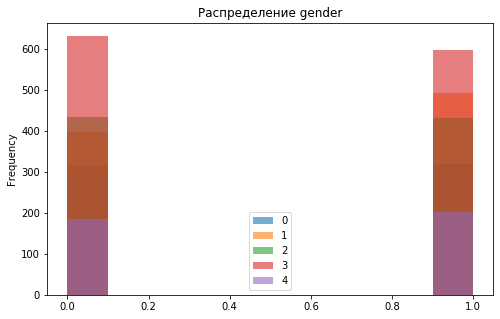

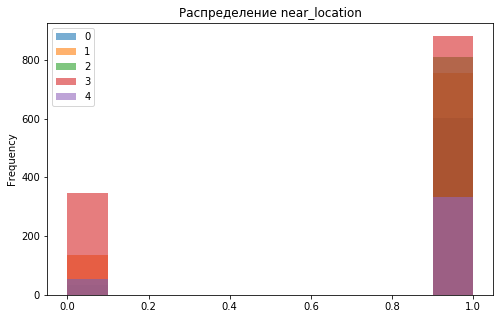

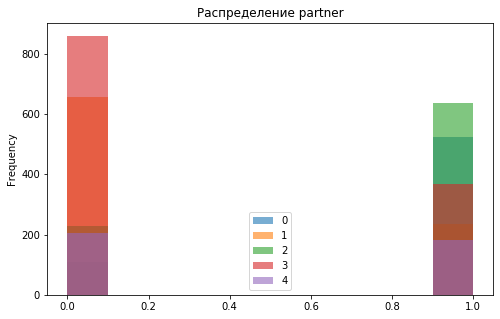

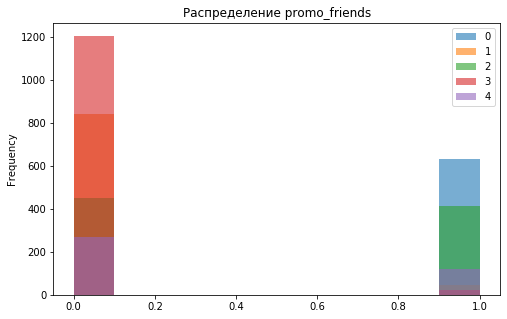

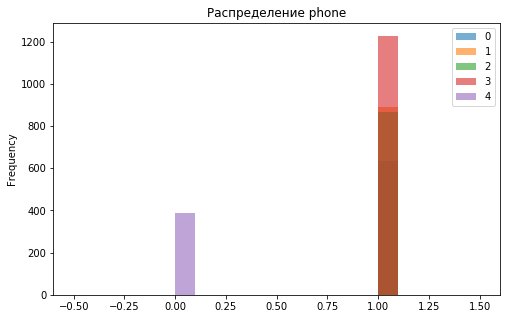

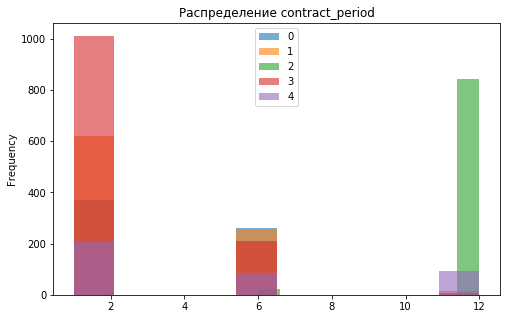

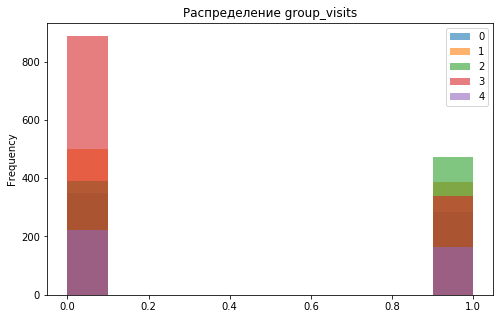

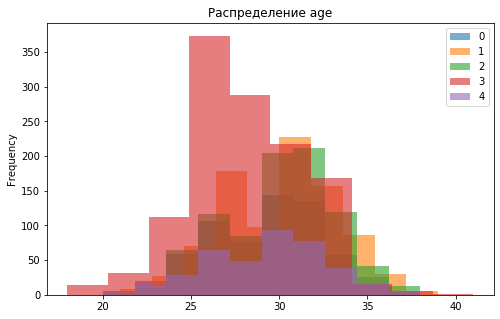

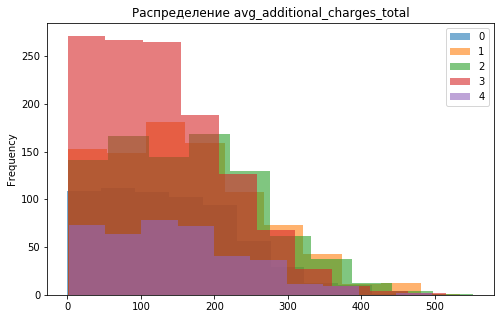

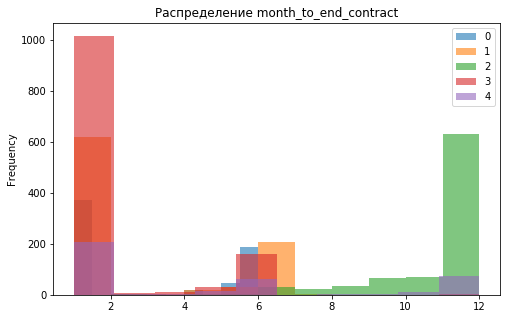

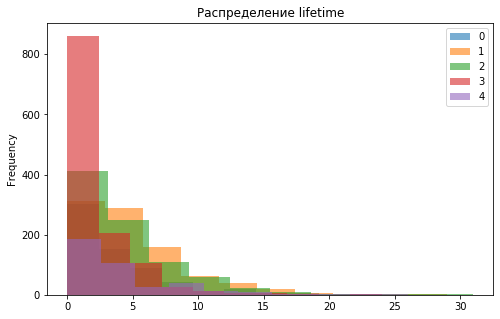

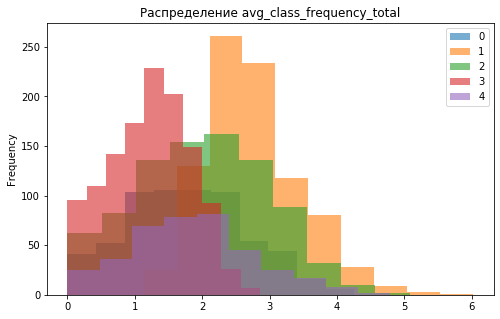

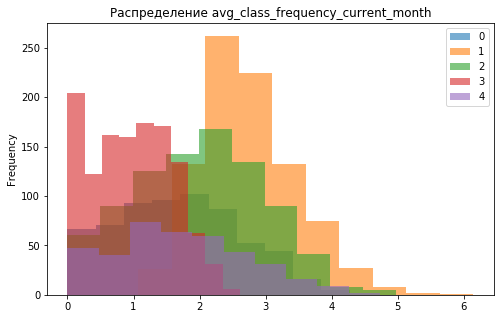

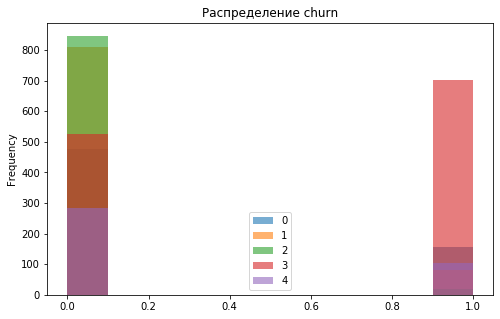

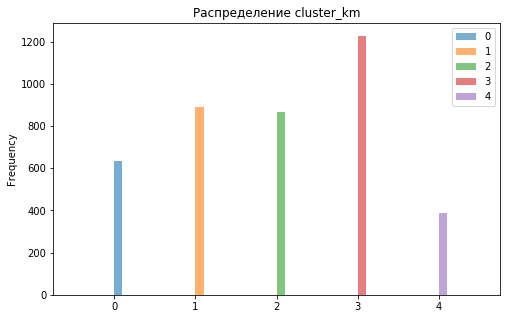

In [25]:
for column in df:
    df.groupby('cluster_km')[column].plot(kind = 'hist', alpha = .6, 
                                          legend = True, figsize = (8, 5),
                                          title = 'Распределение ' + column)
    plt.show()

## Выводы

Мы проанализировали данные из фитнес-клуба, построили графики корреляции и графики распределения, использовали две модели для прогнозирования оттока клиентов, провели кластеризацию клиентов.

1. Мужчины и женщины посещают зал примерно поровну. Люди предпочитают ходить в зал поближе к дому или работе. Около половины клиентов - сотрудники компаний-партнёров. Треть клиентов пришли по акции "приведи друга". 90% клиентов указывают свои контактные данные. Средняя длительность текущего действующего абонемента - 4.7 месяца. Групповые занятия посещают немного меньше половины клиентов. Средний возраст - около 30 лет (26-32). Средняя суммарная выручка от других услуг фитнес-центра - 147. Средний срок до окончания - около 4 месяцев. Время с момента первого обращения - 3,7 месяцев. Средняя частота посещений в неделю за все время с начала действия абонемента - 1,88. Средняя частота посещений в неделю за предыдущий месяц - 1,77. Отток в текущем месяце 26%.


2. На графике корреляции обнаружены сильная зависимость между сроком абонемента и временем до его окончания, а также между средней частотой посещений  за все время и за предыдущий месяц.


3. Применили две модели для прогнозирования оттока клиентов LogisticRegression и RandomForestClassifier. Выяснили, что на основе метрик accuracy, precision, recall модель линейной регрессии показала себя лучше.


4. Построив дендрограмму, выяснили, что данные можно разделить на 4 основных кластера. Далее мы взяли число кластеров, равное пяти.


5. Изучив кластеры, мы смогли составить портрет клиента, подверженного оттоку: живут/работают в отдалении от клуба, низкий lifetime, не приходят по акции с другом, редко посещают групповые занятия, молодые люди до 30, посещают клуб менее 1 р в неделю, мало тратят на дополнительные услуги, короткий срок до окончания абонемента.
 

Рекомендации для стратегии взаимодействия с клиентами и их удержания.

1. Увеличить затраты на рекламу в близлежащих районах, ведь клиентам удобнее посещать зал, если он находится рядом.
2. За каждого приведенного друга давать небольшую скидку, бесплатное занятие или бесплатную дополнительную услугу.
3. Поддерживать надежные кластеры и предлагать им уникальные услуги (семейный абонемент, личный шкафчик, бесплатный коктейль и т.п.).
4. На основе этого анализа определить конкретных клиентов, склонных к оттоку, и пытаться их удержать. 
5. Акция на абонемент с длительным сроком (6-12 мес).